<a href="https://colab.research.google.com/github/ColinCMach/LearningPytorch/blob/main/Copy_of_03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [ ]:
# Check for GPU
!nvidia-smi

Fri Oct 21 18:18:07 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

1.12.1+cu113


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [ ]:
import torchvision 
from torchvision import datasets
from torchvision.transforms import ToTensor
train_data = datasets.MNIST(
    root = ".",
    train = True,
    download = True,
    transform = ToTensor()
)
test_data = datasets.MNIST(
    root = ".",
    train = False,
    download = True,
    transform = ToTensor()
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



## 6. Visualize at least 5 different samples of the MNIST training dataset.

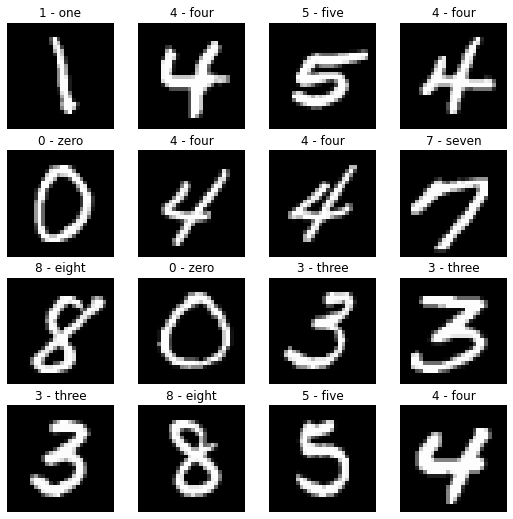

In [ ]:
class_names = train_data.classes
class_to_idx = train_data.class_to_idx
class_to_idx
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(9,9))
rows,cols = 4,4
for i in range (1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size =[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap = 'gray')
  plt.title(class_names[label])
  plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [ ]:

from torch.utils.data import DataLoader

BATCH_SIZE = 32

# turn dfataset into iterabl;es
train_dataloader = DataLoader(dataset = train_data, batch_size = BATCH_SIZE,
                               shuffle = True 
                               )
test_dataloader = DataLoader(dataset = test_data, batch_size = BATCH_SIZE, shuffle = False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f5b5874c990>,
 <torch.utils.data.dataloader.DataLoader at 0x7f5b59031990>)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [ ]:
from torch import nn

class NumbersModel(nn.Module):
  def __init__(self, input_shape, hidden_units, out_shape):
    super().__init__()
    self.conv_layer_1 = nn.Sequential(nn.Conv2d(in_channels = input_shape, out_channels = hidden_units, kernel_size = 3, stride = 1, padding = 1),
                                      nn.ReLU(),
                                      nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3, stride = 1, padding =1),
                                      nn.ReLU(),
                                      nn.MaxPool2d(kernel_size =2))
    self.conv_layer_2 = nn.Sequential(nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3, stride= 1, padding = 1),
                                      nn.ReLU(),
                                      nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size  = 3, stride = 1, padding =1),
                                      nn.ReLU(),
                                      nn.MaxPool2d(kernel_size = 2))
    self.classifier = nn.Sequential(nn.Flatten(),
                                    nn.Linear(in_features = hidden_units *49, out_features = out_shape))
    
  def forward(self, x):
    x = self.conv_layer_1(x)
    # print(x.shape)
    x= self.conv_layer_2(x)
    # print(x.shape)
    x = self.classifier(x)
    return x

In [ ]:
model = NumbersModel(input_shape = 1, hidden_units = 10, out_shape = len(class_names)).to(device)
model

NumbersModel(
  (conv_layer_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [ ]:
x = torch.rand(2, 1, 2,3)
print(x)
y = torch.squeeze(x, dim = 1)
print(y)

q = torch.squeeze(x, dim = 1)

q

tensor([[[[0.3624, 0.4293, 0.2738],
          [0.4310, 0.0078, 0.5140]]],


        [[[0.7989, 0.6556, 0.3955],
          [0.7936, 0.3612, 0.8560]]]])
tensor([[[0.3624, 0.4293, 0.2738],
         [0.4310, 0.0078, 0.5140]],

        [[0.7989, 0.6556, 0.3955],
         [0.7936, 0.3612, 0.8560]]])


tensor([[[0.3624, 0.4293, 0.2738],
         [0.4310, 0.0078, 0.5140]],

        [[0.7989, 0.6556, 0.3955],
         [0.7936, 0.3612, 0.8560]]])

In [ ]:
import requests
from pathlib import Path
# download helper functions from learn p[ytorch repo]
if Path("helper_function.py").is_file():
  print("helper functions already exists skippinf download")
else:
  print("Downnloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_function.py", "wb") as f:
    f.write(request.content)

Downnloading helper_functions.py


In [ ]:
from helper_function import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model.parameters(), lr =0.1)

In [ ]:
epochs = 5
from tqdm.auto import tqdm

for epoch in (tqdm(range(epochs))):
  print(f"epoch:{epoch}-------------")
  train_loss , train_acc = 0,0
  model.train()
  for batch, (X,y)  in enumerate(train_dataloader):
    
    
    X,y = X.to(device), y.to(device)
    y_pred = model(X)
    # print(y.dtype)
    # calcualte loss

    loss = loss_fn(y_pred,y)
    train_loss += loss
    train_acc += accuracy_fn(y_true = y,
                             y_pred = y_pred.argmax(dim = 1))
    
    # optime the zero grad
    optimizer.zero_grad()

    # loss backward
    loss.backward()
    # Optimizre step
    optimizer.step()
    # time to tesst
  test_loss , test_acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      X_test, y_test = X_test.to(device), y_test.to(device)
      test_pred = model(X_test)
      # test loss
      test_loss += loss_fn(test_pred,y_test)
      test_acc += accuracy_fn(y_true = y_test, y_pred = test_pred.argmax(dim = 1))
  #Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

  #calcualte the test acc per batch 
    test_acc /= len(test_dataloader)
  print(f"train loss:{train_loss}| Test loss:{test_loss} | Test acc:{test_acc}")


  0%|          | 0/5 [00:00<?, ?it/s]

epoch:0-------------
train loss:743.2350463867188| Test loss:0.0782046988606453 | Test acc:97.54392971246007
epoch:1-------------
train loss:154.8877716064453| Test loss:0.051961563527584076 | Test acc:98.31269968051119
epoch:2-------------
train loss:124.37537384033203| Test loss:0.04875706508755684 | Test acc:98.38258785942492
epoch:3-------------
train loss:107.29241943359375| Test loss:0.04499522224068642 | Test acc:98.59225239616613
epoch:4-------------
train loss:95.55223846435547| Test loss:0.038469478487968445 | Test acc:98.69209265175719


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [ ]:
train_features_batch , train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

image size :torch.Size([1, 28, 28])
 Label  4, label size: torch.Size([])


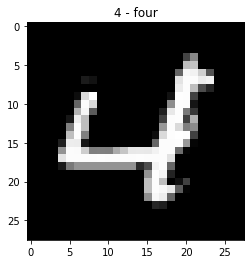

In [ ]:
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[1], train_labels_batch[1]
plt.imshow(img.squeeze(), cmap = "gray")
plt.title(class_names[label])
print(f"image size :{img.shape}")
print(f" Label  {label}, label size: {label.shape}")

In [ ]:
import random 

test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k = 9):
  test_samples.append(sample)
  test_labels.append(label)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

# view the first sample shape
test_samples[0].shape


torch.Size([1, 28, 28])

In [ ]:
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device:torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:

      # prepare the sampeladd a batch dimension and pass to target device dim 0 means it makest he colums equal 1
      sample = torch.unsqueeze(sample,dim =0).to(device)

      #forward pass or basically the models raw outputs
      pred_logits = model(sample)
      #go from prediction logit to prediction probability
      pred_prob = torch.softmax(pred_logits.squeeze(), dim = 0)
      # get pred off the Gpu so we can further calculate it
      pred_probs.append(pred_prob.cpu())
  return torch.stack(pred_probs)


In [ ]:
pred_probs = make_predictions(model = model, data = test_samples)
pred_probs

tensor([[1.4040e-09, 2.4258e-08, 6.7309e-11, 2.3852e-04, 1.3194e-09, 9.9976e-01,
         5.8716e-08, 5.1114e-09, 2.1242e-07, 1.0105e-07],
        [1.6007e-09, 3.5922e-07, 8.3058e-08, 4.2776e-02, 4.0929e-03, 1.6071e-04,
         1.9510e-09, 6.6070e-04, 1.4169e-05, 9.5230e-01],
        [2.3524e-09, 4.6094e-06, 5.3023e-03, 9.9255e-01, 1.7939e-06, 2.0796e-03,
         5.5233e-07, 1.5290e-07, 6.2953e-05, 3.3900e-08],
        [9.8012e-01, 3.5061e-08, 3.9521e-06, 1.3057e-10, 4.3056e-07, 3.9887e-07,
         1.9852e-02, 6.4976e-10, 8.6614e-06, 1.8259e-05],
        [3.3607e-10, 6.7091e-08, 5.0241e-07, 9.9140e-09, 9.9993e-01, 4.6478e-07,
         1.5670e-06, 1.0323e-08, 7.0140e-05, 6.3013e-10],
        [1.2267e-13, 1.0117e-08, 8.1669e-06, 9.9999e-01, 8.4568e-11, 9.5735e-11,
         1.6817e-14, 1.7389e-07, 6.3568e-08, 1.7552e-09],
        [5.9987e-14, 2.5125e-07, 9.9656e-01, 1.4152e-03, 2.4433e-10, 1.8349e-13,
         5.7143e-14, 1.5655e-04, 1.8706e-03, 2.5105e-07],
        [4.5984e-08, 1.5495

In [ ]:
preds = pred_probs.argmax(dim = 1)
preds

tensor([5, 9, 3, 0, 4, 3, 2, 8, 5])

In [ ]:
test_labels

[5, 9, 3, 0, 4, 3, 2, 8, 5]

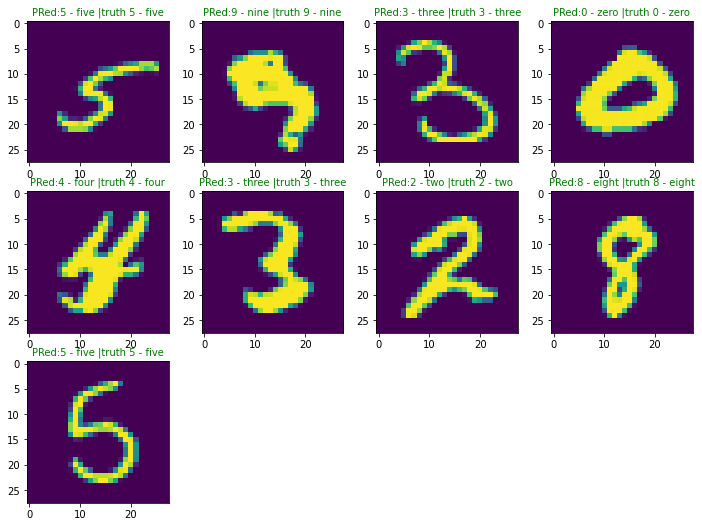

In [ ]:
plt.figure(figsize = (12,12))
nrows = 4
ncols = 4
for i,sample in enumerate(test_samples):
  plt.subplot(nrows,ncols,i+1)
  # plot the target image
  plt.imshow(sample.squeeze())
  # find teh prediction in the  tecxt form
  pred_label = class_names[preds[i]]
  # get the truth abel
  truth_label = class_names[test_labels[i]]

  title_text = f"PRed:{pred_label} |truth {truth_label}"

  if pred_label == truth_label:
    plt.title(title_text,fontsize = 10, c = "g")
  else:
    plt.title(title_text, fontsize = 10, c = "r")


## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [ ]:
from tqdm.auto import tqdm

# make prediction with trained model
y_preds = []
model.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc = "MAkine preds"):
    X, y = X.to(device), y.to(device)
    y_logit = model(X)
    # turn predictions from logits into prediction probabilites
    y_pred = torch.softmax(y_logit.squeeze(), dim = 0).argmax(dim = 1)
    # put prediticton on CPU for evalutation
    y_preds.append(y_pred.cpu())
  #concatinatew the list of preditions into tensor
  y_pred_tensor = torch.cat(y_preds)
  print(y_pred_tensor[:10])


MAkine preds:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([7, 2, 1, 0, 4, 1, 8, 8, 8, 9])


In [ ]:
len(y_pred_tensor)

10000

In [ ]:
# See if required packages are downloaded
try:
  import torchmetrics, mlxtend
  print(f" Mlx tend Version:{mlxtend.__version__}")
  assert int (mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be higher than 0.19.0 or higher"
except:
  !pip install torchmetrics 
  import torchmetrics, mlxtend
  print(f"mlx version:{mlxtend.__version__}")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 529 kB 14.4 MB/s 
mlx version:0.14.0


In [ ]:
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

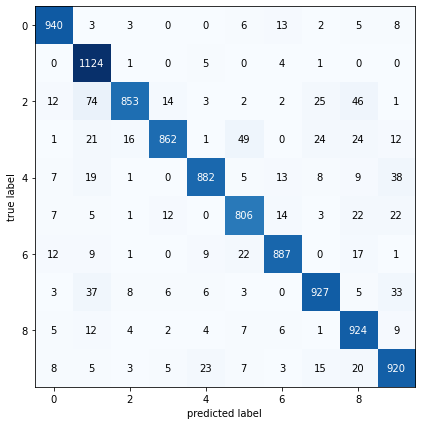

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#2, set up instance and compare prediction to targets
confmat = ConfusionMatrix(num_classes = len(class_names))

confmat_tensor = confmat(preds = y_pred_tensor, target =test_data.targets)

# plot the confusion matrix

fig ,ax = plot_confusion_matrix(conf_mat = confmat_tensor.numpy(), figsize = (10,7))

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [ ]:
rand_tensor = torch.randn([1,3,64,64])

conv_layer = nn.Conv2d(in_channels = 3, out_channels = 1, kernel_size  = 1, stride = 1, padding =1)


new = conv_layer(rand_tensor)
new.shape

# as the kernel size increases the shape of the thrid and 4th dimsnsion decrease linearly

torch.Size([1, 1, 66, 66])

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [ ]:
# I think that since numbers are pretty distinct it would be mcuh aharder for the computer to mix uip numbers as opposed to clothing that share similar features so there is no modeling error that I am aware of.